# Text Generation with Markov Chain
    - States => Characters
    - ngram

In [1]:
import numpy as np

In [302]:
f = open('../datasets/sherlock.txt')#open('../class_04/face_recognition.py')#
text = f.read()
f.close()


In [303]:
print(text[:4000])





                          THE COMPLETE SHERLOCK HOLMES

                               Arthur Conan Doyle



                                Table of contents

               A Study In Scarlet

               The Sign of the Four

                  The Adventures of Sherlock Holmes
               A Scandal in Bohemia
               The Red-Headed League
               A Case of Identity
               The Boscombe Valley Mystery
               The Five Orange Pips
               The Man with the Twisted Lip
               The Adventure of the Blue Carbuncle
               The Adventure of the Speckled Band
               The Adventure of the Engineer's Thumb
               The Adventure of the Noble Bachelor
               The Adventure of the Beryl Coronet
               The Adventure of the Copper Beeches

                  The Memoirs of Sherlock Holmes
               Silver Blaze
               The Yellow Face
               The Stock-Broker's Clerk
               The "Gloria 

In [304]:
text = text[3433:]


In [52]:
#text.split('\n')

In [261]:
data = [each.strip() for each in text.split('\n') if each]
# data = data.strip()

data = ' '.join(data)
#data[:10000]

In [262]:
from nltk.tokenize import word_tokenize
len(set(word_tokenize(data)))

21758

In [263]:
states = set(data)
print(len(states))

96


In [264]:
T = {} # Transition Matrix

n = 5

for i in range(len(data) - n):
    ngram =  data[i:i+n]
    next_state = data[i+n]
    T_context = T.setdefault(ngram, {})
    T_context[next_state] = T_context.setdefault(next_state, 0) + 1

In [202]:
len(T.keys())

156388

In [328]:
#T

In [266]:
for row in T:
    s = sum(T[row].values())
    for val in T[row]:
        T[row][val] = T[row][val]/s

In [267]:
T['Watso']

{'n': 1.0}

In [186]:
r = np.random.random()
if r <= 0.3:
    print('First')
elif r <= 0.7:
    print('Second')
else:
    print('Third')

Second


In [187]:
np.random.choice([1,2,3,4], p=[0.1,0.2,0.3,0.4])

2

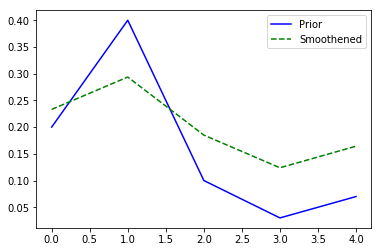

In [308]:
def temperature_sampling(probabilities, temp=1):
    probabilities = np.asarray(probabilities)
    smoothened_probs = np.exp(np.log(probabilities) / temp)
    return list(smoothened_probs / smoothened_probs.sum())


probs = [0.2, 0.4, 0.1, 0.03, 0.07]
sampled = temperature_sampling(probs, 3)
from matplotlib import pyplot as plt
plt.figure()

plt.plot(probs, 'b-', label='Prior')
plt.plot(sampled, 'g--', label='Smoothened')
plt.legend()
plt.show()

In [325]:
def predict_state(ngram, diversity=1):
    if T.get(ngram) is None:
        return ' '
    mapped_ngram = T[ngram]
    mapped_states = list(mapped_ngram.keys())
    probabilities = list(mapped_ngram.values())
    diversified_probs = temperature_sampling(probabilities, temp=diversity)
    return np.random.choice(mapped_states, p=diversified_probs)

In [323]:
predict_state('furni')

't'

In [327]:
def generate(initial=None, size=1000):
    sentence = ''
    if initial is None:
        initial = int(np.random.random() * (len(data) - n))
        initial = data[initial:initial+n]
    
    sentence += initial
    for i in range(size):
        pred = predict_state(initial, diversity=0.7)
        sentence += pred
        initial = sentence[-n:]

    return sentence

print(generate('Watso'))

Watson, to see not for the sky and the stairs end of seen any sort. Then I saw it had a highest is a man hard that this manner turn the fired like this agitated at the choked, and amazements and that the could have meantime is the gave a shores of the next he world a sitting on the troubled and that he man, but laughed across that he had been eyes finger a time to find the servant with a very of the came to you will stared into a clear the Boss at the Baskerville Halloa! what we made had left so far as I look some sound begun to a little with the back, you will find meet us have had take that," said Sherlock taking a suppose you that he is a long the straight would I did you don't knows, and I could say. "She murderers got to night and as an eat tried the best going his help us in the house of the later was at the right, and the corridor, stand that she spoke. "You are away with a small come to be some of the was no among the bands clear to the from the tables, gazing me when your name